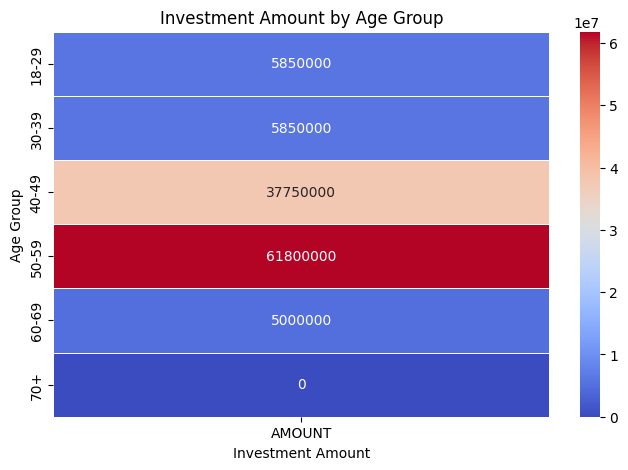

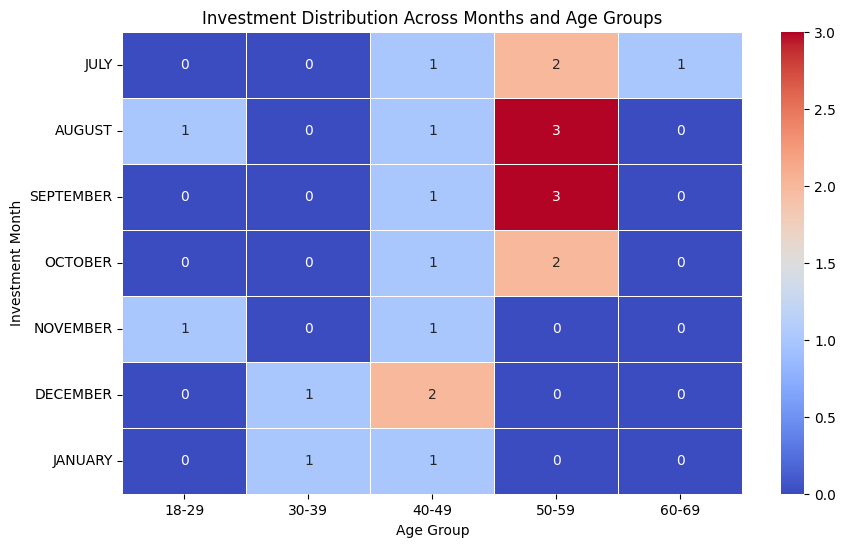

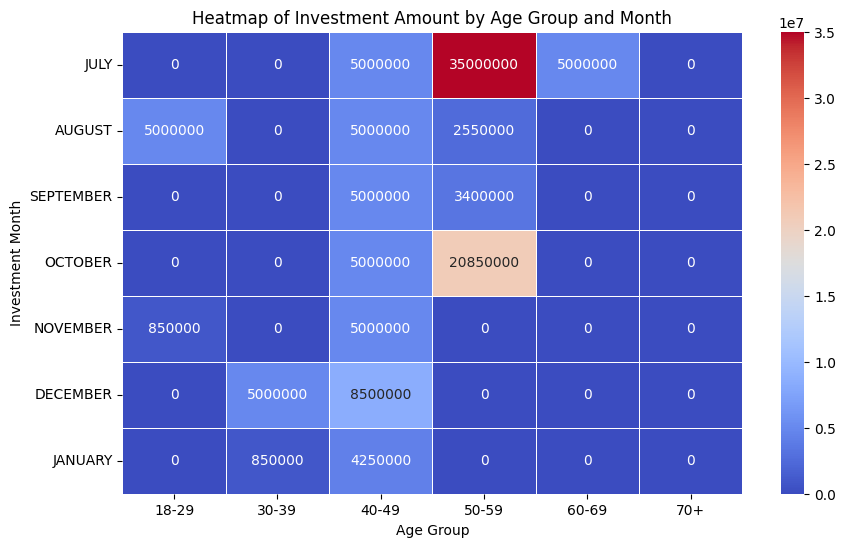

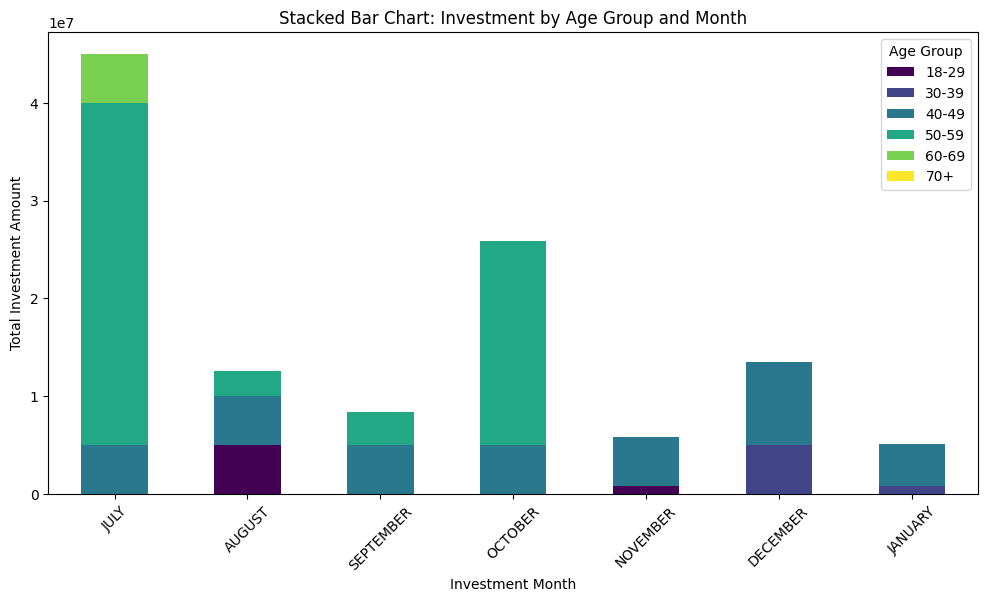

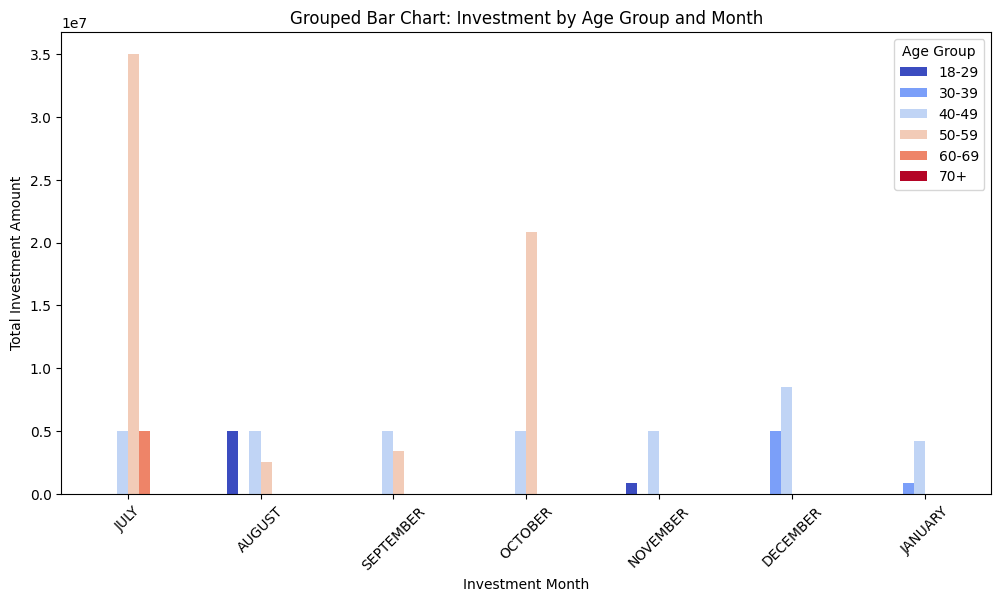

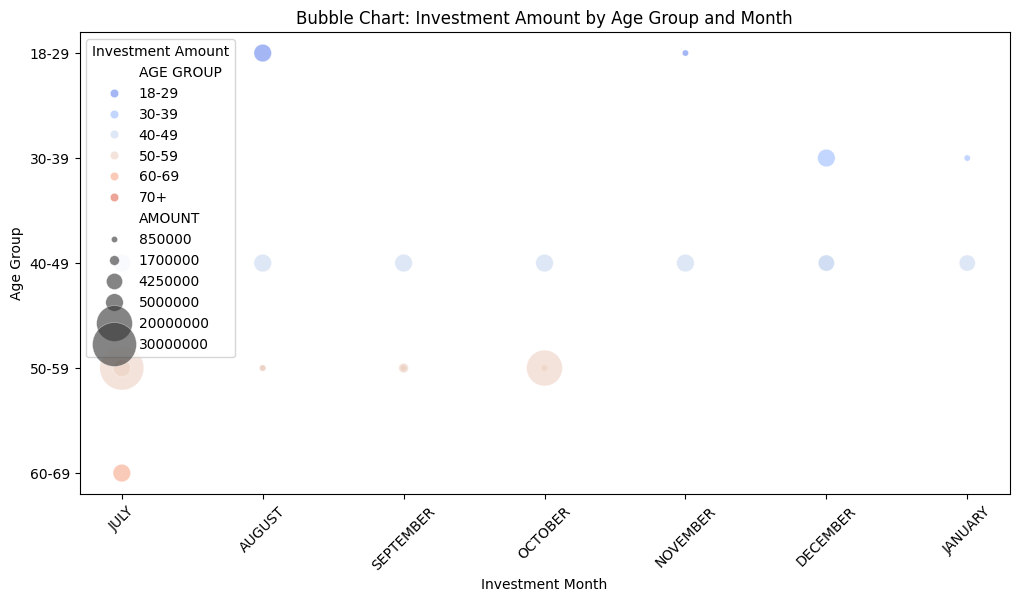

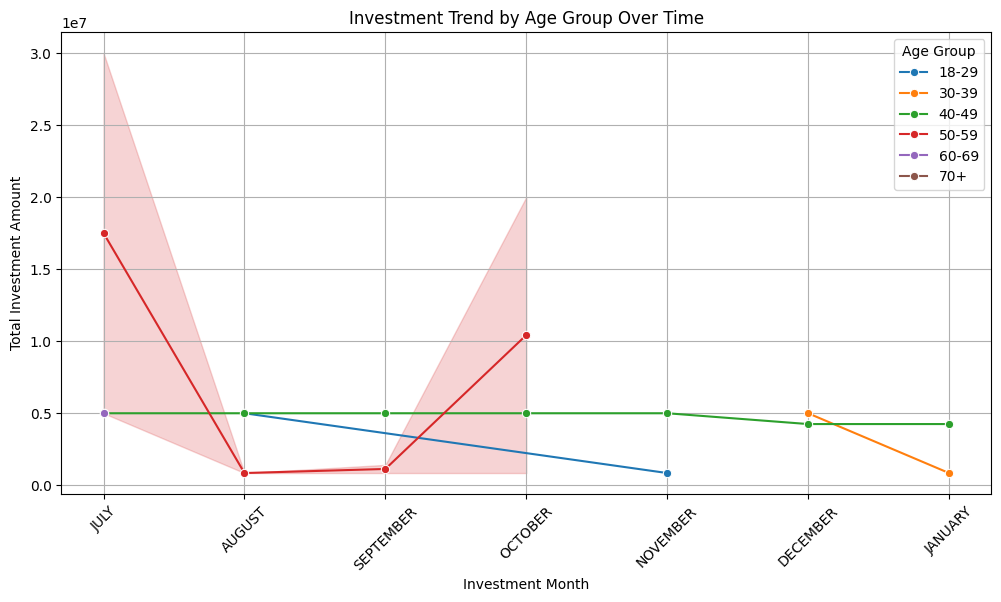

Unique Investment Months: ['JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER', 'JANUARY']
Categories (7, object): ['JULY' < 'AUGUST' < 'SEPTEMBER' < 'OCTOBER' < 'NOVEMBER' < 'DECEMBER' < 'JANUARY']


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Load the Excel file
df = pd.read_excel("processed_investment_data.xlsx")

# Select relevant columns
columns_to_keep = ['DOB', 'INVESTMENT YEAR', 'INVESTMENT MONTH', 'LAND', 'UNIT', 'AMOUNT']
df = df[columns_to_keep].copy()

# Drop rows with missing DOB or AMOUNT
df = df.dropna(subset=['DOB', 'AMOUNT'])

# Convert DOB to datetime format and calculate age
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df = df.dropna(subset=['DOB'])  # Drop rows where DOB couldn't be parsed
df['AGE'] = df['DOB'].apply(lambda x: 2025 - x.year if pd.notnull(x) else None)

# Ensure INVESTMENT MONTH values are uppercase and clean
month_order = ['JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER', 'JANUARY']
df['INVESTMENT MONTH'] = df['INVESTMENT MONTH'].astype(str).str.strip().str.upper()
df = df[df['INVESTMENT MONTH'].isin(month_order)]  # Keep only valid months
df['INVESTMENT MONTH'] = pd.Categorical(df['INVESTMENT MONTH'], categories=month_order, ordered=True)

# Convert UNIT and AMOUNT to numeric
df['UNIT'] = pd.to_numeric(df['UNIT'], errors='coerce')
df['AMOUNT'] = pd.to_numeric(df['AMOUNT'], errors='coerce')

df = df.dropna()

# Define age groups
bins = [18, 30, 40, 50, 60, 70, 100]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]
df["AGE GROUP"] = pd.cut(df["AGE"], bins=bins, labels=labels, right=False)

# Ensure all investment months are categorized correctly
df = df[df["INVESTMENT MONTH"].notna()]

# 1. Heatmap: Investment Amount by Age Group
age_investment_pivot = df.pivot_table(index="AGE GROUP", values="AMOUNT", aggfunc="sum")
plt.figure(figsize=(8, 5))
sns.heatmap(age_investment_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Investment Amount by Age Group")
plt.xlabel("Investment Amount")
plt.ylabel("Age Group")
plt.show()

# 2. Cross-tabulation: Age Group vs. Investment Month
age_month_ct = pd.crosstab(df["INVESTMENT MONTH"], df["AGE GROUP"])
plt.figure(figsize=(10, 6))
sns.heatmap(age_month_ct, annot=True, cmap="coolwarm", linewidths=0.5, fmt="d")
plt.title("Investment Distribution Across Months and Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Investment Month")
plt.show()

# 3. Heatmap of Investment Amount by Age Group and Month
heatmap_data = df.pivot_table(index="INVESTMENT MONTH", columns="AGE GROUP", values="AMOUNT", aggfunc="sum", fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.xlabel("Age Group")
plt.ylabel("Investment Month")
plt.title("Heatmap of Investment Amount by Age Group and Month")
plt.show()

# 4. Stacked Bar Chart: Investment by Age Group and Month
df_grouped = df.groupby(["INVESTMENT MONTH", "AGE GROUP"])["AMOUNT"].sum().unstack()
df_grouped.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Stacked Bar Chart: Investment by Age Group and Month")
plt.xlabel("Investment Month")
plt.ylabel("Total Investment Amount")
plt.legend(title="Age Group")
plt.xticks(rotation=45)
plt.show()

# 5. Grouped Bar Chart: Investment by Age Group and Month
df_grouped.plot(kind="bar", stacked=False, figsize=(12, 6), colormap="coolwarm")
plt.title("Grouped Bar Chart: Investment by Age Group and Month")
plt.xlabel("Investment Month")
plt.ylabel("Total Investment Amount")
plt.legend(title="Age Group")
plt.xticks(rotation=45)
plt.show()

# 6. Bubble Chart: Investment Amount by Age Group and Month
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="INVESTMENT MONTH", y="AGE GROUP", size="AMOUNT", hue="AGE GROUP", sizes=(20, 1000), palette="coolwarm", alpha=0.6)
plt.title("Bubble Chart: Investment Amount by Age Group and Month")
plt.xlabel("Investment Month")
plt.ylabel("Age Group")
plt.xticks(rotation=45)
plt.legend(title="Investment Amount")
plt.show()

# 7. Trendline: Investment Trend by Age Group Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="INVESTMENT MONTH", y="AMOUNT", hue="AGE GROUP", marker="o")
plt.xticks(rotation=45)
plt.title("Investment Trend by Age Group Over Time")
plt.xlabel("Investment Month")
plt.ylabel("Total Investment Amount")
plt.legend(title="Age Group")
plt.grid(True)
plt.show()

# Check if all months are present
print("Unique Investment Months:", df["INVESTMENT MONTH"].unique())
